In [1]:
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite
import numpy as np
import matplotlib.pyplot as plt

model = read_sbml_model('yeastGEM.xml')

In [36]:
xyodict = {1: "r_2104", # xylitol transport
           2: "r_1719", # D-xylose transport
           3: "r_1093", # xylose reductase
           4: "r_1092"  # xylitol dehydrogenase
          }

In [51]:
medium_glu = model.medium  # 100% glucose as carbon source in the medium

medium_glu0 = model.medium  # 100% xylose as carbon source in the medium
with model: 
    medium_glu0['r_1714'] = 0.0
    medium_glu0['r_1718'] = 1.0

medium_glu50 = model.medium # 50% glucose and 50% xylose as carbon sources in the medium
with model: 
    medium_glu50['r_1714'] = 0.5
    medium_glu50['r_1718'] = 0.5
    
medium_glu75 = model.medium # 75% glucose and 25% xylose as carbon sources in the medium
with model: 
    medium_glu75['r_1714'] = 0.75
    medium_glu75['r_1718'] = 0.25
    
medium_glu25 = model.medium # 25% glucose and 75% xylose as carbon sources in the medium
with model: 
    medium_glu25['r_1714'] = 0.25
    medium_glu25['r_1718'] = 0.75
    
medium_glu60 = model.medium # 60% glucose and 40% xylose as carbon sources in the medium
with model: 
    medium_glu60['r_1714'] = 0.60
    medium_glu60['r_1718'] = 0.40

medium_glu40 = model.medium # 40% glucose and 60% xylose as carbon sources in the medium
with model: 
    medium_glu40['r_1714'] = 0.40
    medium_glu40['r_1718'] = 0.60

for element in medium_glu.keys():
    print(model.reactions.get_by_id(element).name, model.reactions.get_by_id(element), medium_glu[element])

ammonium exchange r_1654: s_0420[e] <=>  1000.0
D-glucose exchange r_1714: s_0565[e] <=>  1.0
H+ exchange r_1832: s_0796[e] <=>  1000.0
iron(2+) exchange r_1861: s_0925[e] <=>  1000.0
oxygen exchange r_1992: s_1277[e] <=>  1000.0
phosphate exchange r_2005: s_1324[e] <=>  1000.0
potassium exchange r_2020: s_1374[e] <=>  1000.0
sodium exchange r_2049: s_1438[e] <=>  1000.0
sulphate exchange r_2060: s_1468[e] <=>  1000.0
water exchange r_2100: s_0805[e] <=>  1000.0
chloride exchange r_4593: s_4200[e] <=>  1000.0
Cu2(+) exchange r_4594: s_4201[e] <=>  1000.0
Mn(2+) exchange r_4595: s_4202[e] <=>  1000.0
Zn(2+) exchange r_4596: s_4203[e] <=>  1000.0
Mg(2+) exchange r_4597: s_4204[e] <=>  1000.0
Ca(2+) exchange r_4600: s_4199[e] <=>  1000.0


In [97]:
with mutant_model:
    # model.medium = medium_glu  # 100% glucose as carbon source in the medium
    # model.medium = medium_glu0 # 100% xylose as carbon source in the medium
    # model.medium = medium_glu75 # 75% glucose and 25% xylose as carbon sources in the medium
    # model.medium = medium_glu50 # 50% glucose and 50% xylose as carbon sources in the medium
    # model.medium = medium_glu25 # 25% glucose and 75% xylose as carbon sources in the medium
    # model.medium = medium_glu40 # 60% glucose and 40% xylose as carbon sources in the medium
    model.medium = medium_glu60 # 40% glucose and 60% xylose as carbon sources in the medium
## Regulations
    model.reactions.r_1719.bounds = (0,1) # regulation for xylose transporter
    model.reactions.r_1093.bounds = (0,1) # regulation for xylose reductase
    model.genes.YLR070C.knock_out() # knockout for xylitol dehydrogenase
    model.reactions.r_2104.bounds = (0.75* medium_glu60['r_1718'],0.40) # regulation for xylitol transporter
    model.reactions.r_0889.bounds = (0,1) # 6-phosphogluconate dehydrogenase
    model.reactions.r_0466.bounds = (0,1) # Glucose-6-phosphate dehydrogenase
    
    ## solve model
    # model.objective = model.reactions.r_2104 # objective is maximum xylitol production
    solution3 = model.optimize()
    print(model.summary())
    for key in xyodict.keys():
        print(model.reactions.get_by_id(xyodict[key]).name, model.reactions.get_by_id(xyodict[key]).flux)
    print(model.reactions.r_2111.name, model.reactions.r_2111.flux)
    print(model.reactions.r_1714.name, model.reactions.r_1714.flux)
    print(model.reactions.r_1166.name, model.reactions.r_1166.flux)

Objective
1.0 r_2111 = 0.04691493348189254

Uptake
------
Metabolite Reaction      Flux  C-Number  C-Flux
 s_0420[e]   r_1654    0.3354         0   0.00%
 s_0565[e]   r_1714       0.6         6  70.59%
 s_0579[e]   r_1718       0.3         5  29.41%
 s_0796[e]   r_1832   0.02373         0   0.00%
 s_0925[e]   r_1861 1.426E-06         0   0.00%
 s_1277[e]   r_1992     1.349         0   0.00%
 s_1324[e]   r_2005    0.3053         0   0.00%
 s_1374[e]   r_2020 0.0001703         0   0.00%
 s_1438[e]   r_2049 0.0001863         0   0.00%
 s_1468[e]   r_2060  0.004035         0   0.00%
 s_4200[e]   r_4593 6.052E-05         0   0.00%
 s_4201[e]   r_4594 3.092E-05         0   0.00%
 s_4202[e]   r_4595 0.0001281         0   0.00%
 s_4203[e]   r_4596 3.509E-05         0   0.00%
 s_4204[e]   r_4597 5.829E-05         0   0.00%
 s_4199[e]   r_4600 1.018E-05         0   0.00%

Secretion
---------
Metabolite Reaction       Flux  C-Number  C-Flux
 s_0458[e]   r_1672     -1.578         1  51.26%
 s_0776

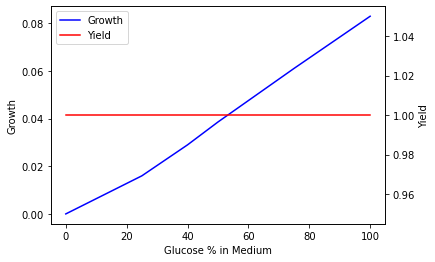

In [22]:
# Create data
gluc_cont = [0, 25, 40, 50, 60, 75, 100]
growth = [0, 0.016, 0.029, 0.0386, 0.0476, 0.0611, 0.083]
Cyield = [1, 1, 1, 1, 1, 1, 1]

fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()  #instantiate a second axes that shares the same x-axis
lns1 = ax.plot(gluc_cont, growth, '-b', label = 'Growth')
lns2 = ax2.plot(gluc_cont, Cyield, '-r', label = 'Yield')

lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

ax.set_xlabel('Glucose % in Medium')
ax.set_ylabel('Growth')
ax2.set_ylabel('Yield')
plt.show()

